# HW 5 - PCA and SVD
As usual, you are permited to work in groups of up to 4. Please indicate who you worked with. 

This HW will be worth 2X what the other homeworks have been counted as. Due date will be Sunday at 11:59. Upload the saved file to gauchospace as *firstname_lastname-HW5.ipynb*

Good Luck!


#### Question 1: Exploring Gene Space
Imagine that we are doing a set of experiments on yeast cells to understand how they respond to environmental perturbations.

Consider the data matrix X below where each row corresponds to a gene (call them gene 1 and gene 2), and each column
corresponds to an assay (an experimental condition). Let’s say the first five columns are assays every 10 min following heat shock, and the second five columns are assays every 10 min following a shift from glucose to glycerol.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10],[.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0]])

X

array([[ 0. ,  2. ,  4. ,  8. , 10. ,  0. ,  3. ,  6. ,  7.5, 10. ],
       [ 0.5,  1. ,  1.8,  2.4,  3. ,  5. ,  3.3,  2. ,  0.9,  0. ]])

#### Question 1.1
Plot the data points in gene 1 - gene 2 space.

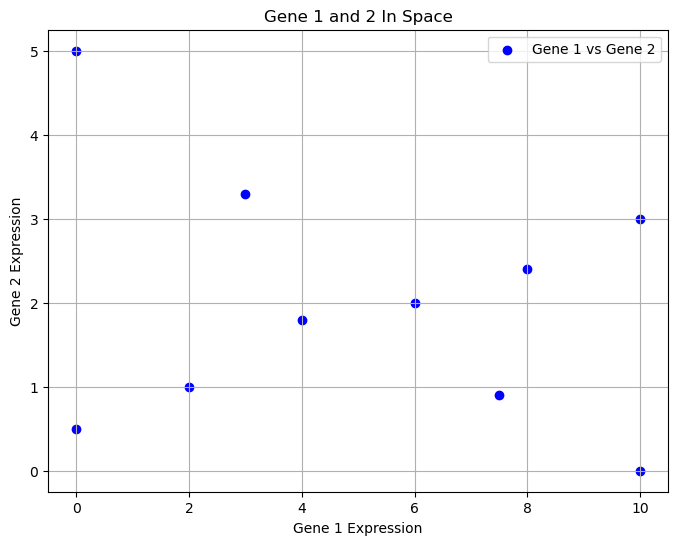

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gene data
gene_1 = np.array([0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10])
gene_2 = np.array([.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0])

# Plotting Gene 1 and Gene 2 
plt.figure(figsize=(8, 6))
plt.scatter(gene_1, gene_2, marker='o', color='blue', label='Gene 1 vs Gene 2')
plt.title('Gene 1 and 2 In Space')
plt.xlabel('Gene 1 Expression')
plt.ylabel('Gene 2 Expression')
plt.legend()
plt.grid(True)
plt.show()

#### Question 1.2
What is the mean expression value for each gene?

In [41]:
import numpy as np

# Calculate the mean expression values
mean_gene_1 = np.mean(X[0, :])
mean_gene_2 = np.mean(X[1, :])

# Print the mean expression values
print("Mean expression value for Gene 1:", mean_gene_1)
print("Mean expression value for Gene 2:", mean_gene_2)


Mean expression value for Gene 1: 5.05
Mean expression value for Gene 2: 1.9899999999999998


#### Question 1.3
What is the variance of the expression value for each gene?

In [43]:
import numpy as np

# Calculate the variance of expression values
variance_gene_1 = np.var(X[0, :])
variance_gene_2 = np.var(X[1, :])

# Print the variance of expression values
print("Variance of expression value for Gene 1:", variance_gene_1)
print("Variance of expression value for Gene 2:", variance_gene_2)


Variance of expression value for Gene 1: 13.022499999999999
Variance of expression value for Gene 2: 2.0349000000000004


#### Question 1.4
Plot the four time courses (2 genes X 2 conditions) as a function of time with the first measurments being time 0 all on the same plot. What can you say about the how the genes are correlated in their responses to these perturbations?

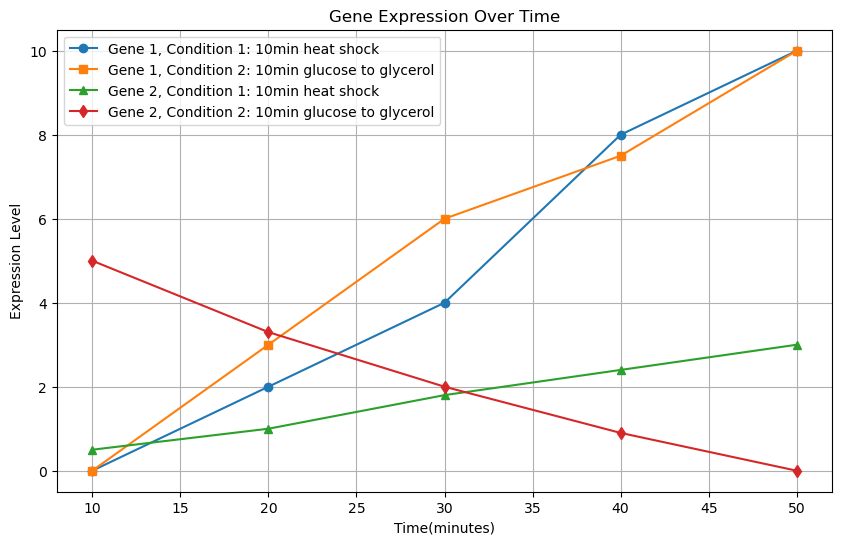

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gene data
#gene_1 = np.array([0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10])
#gene_2 = np.array([.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0])


# Sample time points and gene expression data
time_points = np.array([10,20,30,40,50])  # Time points
gene_1_condition_1 = np.array([0, 2, 4, 8, 10])  # Gene 1, Condition 1
gene_1_condition_2 = np.array([0, 3, 6, 7.5, 10])  # Gene 1, Condition 2
gene_2_condition_1 = np.array([.5, 1, 1.8, 2.4, 3])  # Gene 2, Condition 1
gene_2_condition_2 = np.array([5, 3.3, 2, .9, 0])  # Gene 2, Condition 2

# Plotting the time courses
plt.figure(figsize=(10, 6))
plt.plot(time_points, gene_1_condition_1, label='Gene 1, Condition 1: 10min heat shock', marker='o')
plt.plot(time_points, gene_1_condition_2, label='Gene 1, Condition 2: 10min glucose to glycerol', marker='s')
plt.plot(time_points, gene_2_condition_1, label='Gene 2, Condition 1: 10min heat shock', marker='^')
plt.plot(time_points, gene_2_condition_2, label='Gene 2, Condition 2: 10min glucose to glycerol', marker='d')
plt.title('Gene Expression Over Time')
plt.xlabel('Time(minutes)')
plt.ylabel('Expression Level')
plt.legend()
plt.grid(True)
plt.show()


#### Question 2: PCA on a data matrix
Perform a Principal Component Analysis of the data in the matrix X:
* Create a new matrix Y by subtracting off the mean expression value for each gene from matrix entries for that gene.
* Evaluate the 2 X 2 gene-covariance matrix C using the data in Y.
* Evaluate the eigenvalues of C.
* What fraction of the total variance of the data is accounted for by the first principal component of C? (The total variance of the data is the sum of the variances of gene 1 and gene 2 that you evaluated earlier.)
* Find the principal component eigenvectors and plot their directions on the same plot as the data points. Don’t forget to order your eigenvectors appropriately.

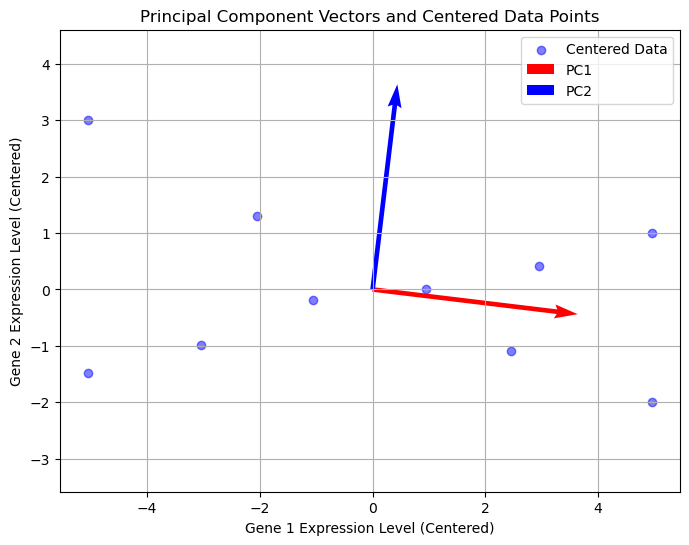

PC1 = [ 0.99280786 -0.11971863] PC2 = [0.11971863 0.99280786]
lambda_1 = 14.649586386608089 lambda_2 = 2.0808580578363545
Fraction of total variance for PC1 = 0.8648571466521444


In [35]:
import numpy as np

#Obtain mean expression values for each gene
mean_gene_1 = np.mean(X[0, :])
mean_gene_2 = np.mean(X[1, :])

#Create a matrix 'Y' subtracting the mean expression value from 'X'
Y = X - np.array([[mean_gene_1], [mean_gene_2]])

#Determine the gene-covariance using the data in 'Y'
C = np.cov(Y)

# Finding the evals and evecs of the covariance matrix
evals, evecs = np.linalg.eig(C)

# sort the numpy function output linalg.eig
idx = evals.argsort()[::-1]

evals = evals[idx]
evecs = evecs[:,idx] 

# Plotting the principle component vectors and the data points of Y
plt.figure(figsize=(8, 6))
plt.scatter(Y[0, :], Y[1, :], color='blue', alpha=0.5, label='Centered Data')
origin = [0, 0]  

# Plotting the principal component vectors
plt.quiver(*origin, *evecs[:,0], color='r', scale=3, label='PC1')
plt.quiver(*origin, *evecs[:,1], color='b', scale=3, label='PC2')

plt.title('Principal Component Vectors and Centered Data Points')
plt.xlabel('Gene 1 Expression Level (Centered)')
plt.ylabel('Gene 2 Expression Level (Centered)')
plt.legend()
plt.grid(True)
plt.axis('equal')  
plt.show()

#Eigen values and eigen vectors of the covariance matrix
print('PC1 =', evecs[:,0], 'PC2 =', evecs[:,1])
print('lambda_1 =', evals[0], 'lambda_2 =', evals[1])

#Fraction of total variance for PC1

frac_totalvar_PC1 = variance_gene_1/ (variance_gene_1 + variance_gene_2)
print('Fraction of total variance for PC1 =', frac_totalvar_PC1)



#### Question 2.1
* Re-express the gene-assay matrix X as a principal component-assay matrix by projecting each data point (column) onto the PCs.
* Plot the reprojected data

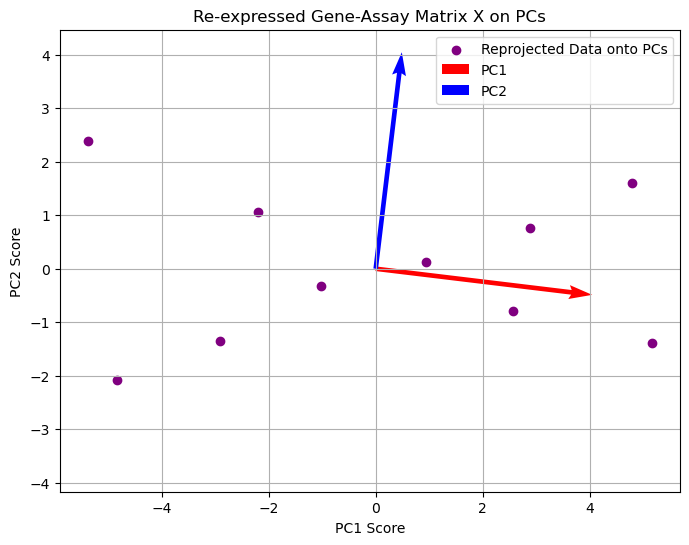

In [37]:
#Projecting matrix X as a PCA matrix
PC_scores = np.dot(evecs.T, Y)

# Plotting the reprojected data (PC scores) with PCs included
plt.figure(figsize=(8, 6))
plt.scatter(PC_scores[0, :], PC_scores[1, :], color='purple', label='Reprojected Data onto PCs')

# Indicate the principal components as arrows
scale_factor = np.max(PC_scores) / np.max(evals) 
plt.quiver(0, 0, evecs[0, 0] * scale_factor, evecs[1, 0] * scale_factor, color='r', scale=1, label='PC1')
plt.quiver(0, 0, evecs[0, 1] * scale_factor, evecs[1, 1] * scale_factor, color='b', scale=1, label='PC2')

plt.title('Re-expressed Gene-Assay Matrix X on PCs')
plt.xlabel('PC1 Score')
plt.ylabel('PC2 Score')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


#### Question 2.2
* For each principal component (row) of the new matrix plot the data as a time series for each block of assays (the first five columns and the second five columns).
* What can you say about the responses of cells to the two assays, heat shock and shift from glucose to glycerol?

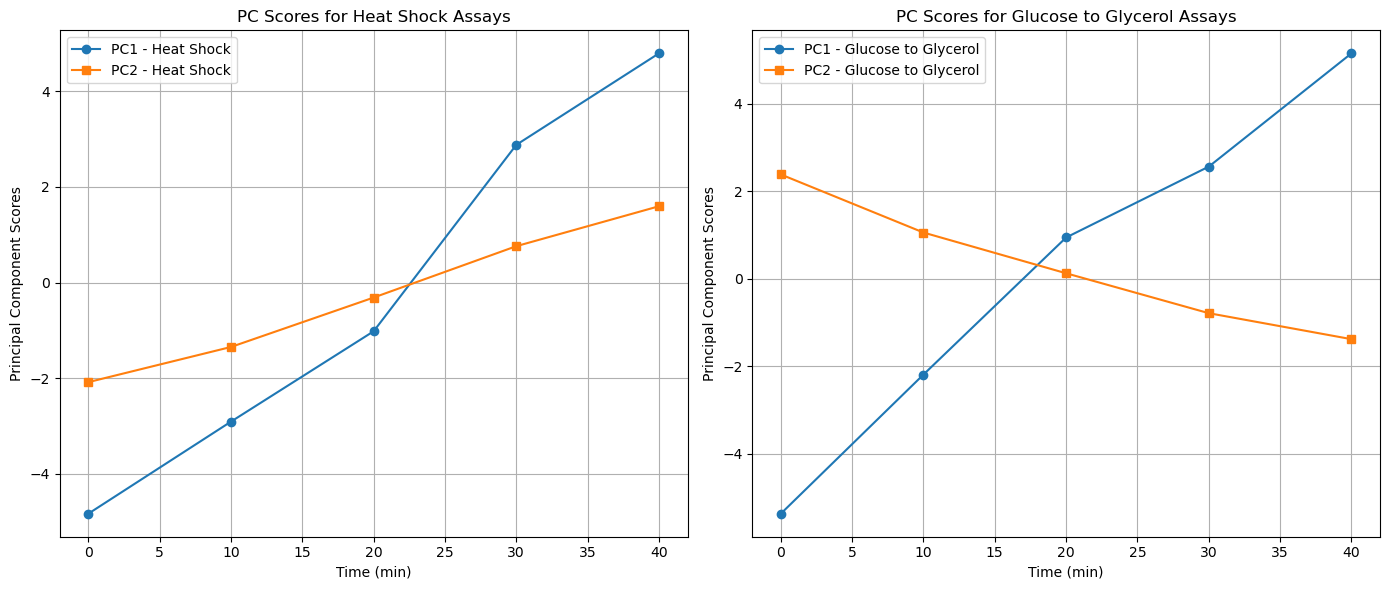

In [38]:
# Splitting the principal component scores into two blocks: Heat Shock (first 5 columns) and Glucose to Glycerol (last 5 columns)
PC_scores_heat_shock = PC_scores[:, :5]
PC_scores_glucose_to_glycerol = PC_scores[:, 5:]

# Define time points for each block of assays (assuming each assay is taken at 10 min intervals starting at time 0)
time_points = np.array([0, 10, 20, 30, 40])  

# Plotting the principal component scores as time series for each block of assays
plt.figure(figsize=(14, 6))

# Plot for Heat Shock
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(time_points, PC_scores_heat_shock[0, :], marker='o', label='PC1 - Heat Shock')
plt.plot(time_points, PC_scores_heat_shock[1, :], marker='s', label='PC2 - Heat Shock')
plt.title('PC Scores for Heat Shock Assays')
plt.xlabel('Time (min)')
plt.ylabel('Principal Component Scores')
plt.legend()
plt.grid(True)

# Plot for Glucose to Glycerol Shift
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(time_points, PC_scores_glucose_to_glycerol[0, :], marker='o', label='PC1 - Glucose to Glycerol')
plt.plot(time_points, PC_scores_glucose_to_glycerol[1, :], marker='s', label='PC2 - Glucose to Glycerol')
plt.title('PC Scores for Glucose to Glycerol Assays')
plt.xlabel('Time (min)')
plt.ylabel('Principal Component Scores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# We can say the response of these cells for the genes show a great amount of variance in gene expression under both conditions for
# PC1. However, there is less variance in gene expression for PC2 compared to PC1. In fact, gene expression for PC2 has decreasing 
# variance for the second condition.

#### Question 3: PCA on uncentered data
Let’s see the difference between finding the principal components of uncentered vs. centered data. Imagine you have the following data matrix X2.

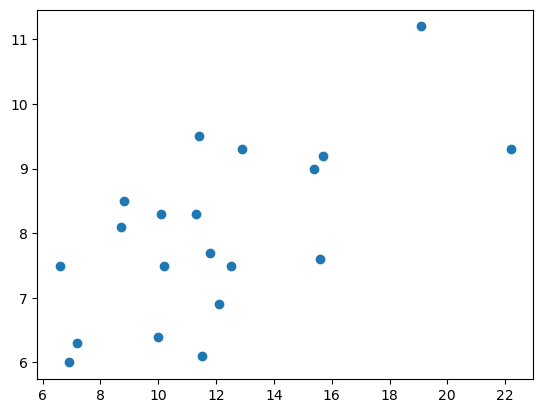

In [46]:
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])


plt.scatter(X2[0,:], X2[1,:])
plt.show()

Numpy's built-in covariance function mean-centers the data automatically. Another way of calculating the covariance matrix is multiply it with its own transpose and divide by the number of observations. I have implemented this function as `Cov_wo_meancentering(X)` below. It should give the same result as `np.cov` with the arguments `rowvar=False, bias=True` if centering is also implemented. 

In [47]:
def Cov_wo_meancentering(X):
    X = X.T
    lenX = X.shape[0]
    covariance = X.T.dot(X)/lenX
    return covariance

np.cov()

TypeError: cov() missing 1 required positional argument: 'm'

* Without centering, i.e. mean subtracting, the data, find the covariance matrix of X2.
* Find the eigenvalues and eigenvectors of the covariance matrix. Reorder youreigenvectors and eigenvalues so that the eigenvector with the highest eigenvalue is in the first column.
* Transform the data X2 into the principal component space and plot each point, show your plot.
* Now redo the previous three steps, but subtract the mean of each dimension from all of the data points how is it different?

## Principle component space for uncentered data

Eigenvectors of uncentered data= [[ 0.84414773 -0.53611064]
 [ 0.53611064  0.84414773]]
Eigenvalues of uncentered data= [222.38580985   2.72819015]


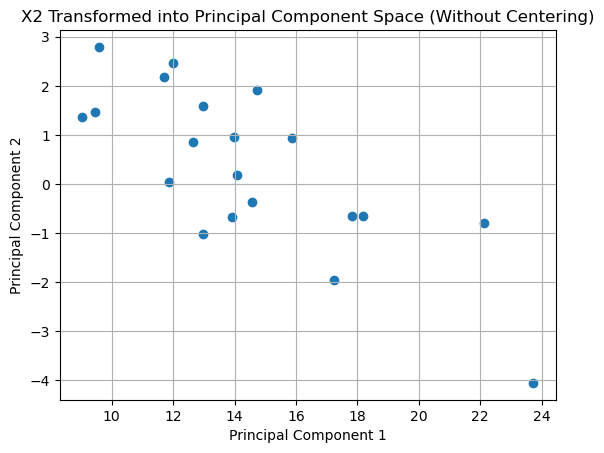

In [64]:
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])

#Finding the evals and evecs of X2 covariance matrix and ordering them
import numpy as np

def Cov_wo_meancentering(X):
    X = X.T  
    lenX = X.shape[0]
    covariance = X.T.dot(X) / lenX  
    return covariance

## Recalculate the covariance matrix for X2 without centering
C_uncentered = Cov_wo_meancentering(X2)

# Step 2: Find the eigenvalues and eigenvectors of the uncentered covariance matrix
evals_uncentered, evecs_uncentered = np.linalg.eig(C_uncentered)

## Ordering eigenvalues and eigenvectors
idx_uncentered = evals_uncentered.argsort()[::-1]   
evals_uncentered = evals_uncentered[idx_uncentered]
evecs_uncentered = evecs_uncentered[:, idx_uncentered]

## Display the ordered eigenvalues and eigenvectors for the uncentered data
print('Eigenvectors of uncentered data=', evecs_uncentered)
print('Eigenvalues of uncentered data=', evals_uncentered)

#Transforming uncentered X2 data into a principle component space
X2_transformed = np.dot(evecs_uncentered.T, X2)

# Plotting the transformed data
plt.scatter(X2_transformed[0,:], X2_transformed[1,:])
plt.title('X2 Transformed into Principal Component Space (Without Centering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Principle component space for centered data

Eigenvectors of centered data= [[ 0.9746031  -0.22393927]
 [ 0.22393927  0.9746031 ]]
Eigenvalues of centered data= [16.85093135  0.99527918]


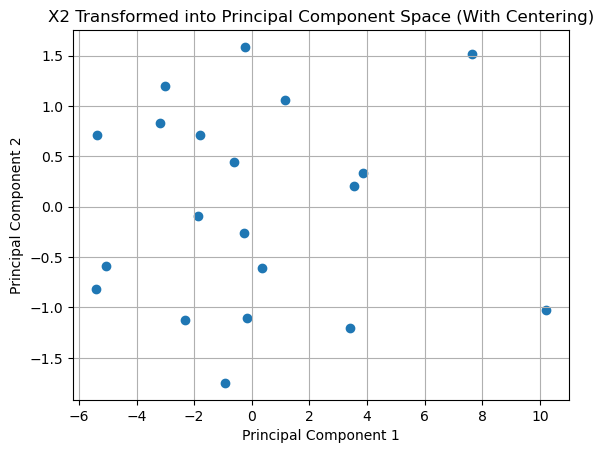

In [63]:
import numpy as np

#Matrix 'X2'
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])

#Mean-centering the data for matrix 'X2'
Y2 = X2 - np.mean(X2, axis=1).reshape(2,1)
#Finding the evals and evecs of X2 covariance matrix and ordering them

def cov_X2(X):
    covariance = np.cov(X)
    return covariance

## Recalculate the covariance matrix for X2 with centering
C_centered = cov_X2(Y2)

# Step 2: Find the eigenvalues and eigenvectors of the centered covariance matrix
evals_centered, evecs_centered = np.linalg.eig(C_centered)

## Ordering eigenvalues and eigenvectors
idx_centered = evals_centered.argsort()[::-1]   
evals_centered = evals_centered[idx_centered]
evecs_centered = evecs_centered[:, idx_centered]

## Display the ordered eigenvalues and eigenvectors for the centered data
print('Eigenvectors of centered data=', evecs_centered)
print('Eigenvalues of centered data=', evals_centered)

#Transforming centered X2 data into a principle component space
X2_transformed = np.dot(evecs_centered.T, Y2)

# Plotting the transformed data
plt.scatter(X2_transformed[0,:], X2_transformed[1,:])
plt.title('X2 Transformed into Principal Component Space (With Centering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## The difference between the uncentered and centered PCA on X2
* Uncentered: Attemps to perform PCA on non-mean centered data doesn't focus on the variance of the data as it relates to the mean
* Centered: Performs PCA on data that focuses on variance around the mean. This gives more insightful implications

#### Question 4: PCA in High dimensions

Download and load the gene expression matrix X `X = np.load('geneExpressionMat_X.npy')`

X is a truncated gene expression matrix of the first 2000 genes across 8 days of sampling the fibroblast response to ectopic expression of transcription factors Oct4, Sox2, Klf4, c-Myc. These factors are called the Yamanaka Factors after [Shinya Yamanaka](https://en.wikipedia.org/wiki/Shinya_Yamanaka) who won a nobel prize for his discovery.  They enabled the creation of [induced pluripotent stem cells](https://en.wikipedia.org/wiki/Induced_pluripotent_stem_cell) which are dedifferentiated, somatic cells that are of enormous experimental value for their use in creating all cell types of the body. 

In this data set, the columns of X are replicates of the reprogramming process in the following order counted in days `[0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`.
 
* Mean center X by its genes (rows)
* Find the covariance matrix of X (This may take a minute to run and is a small taste of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* Sort the eigenvalues and eigenvectors and plot their real part with the Y axis being log scale `plt.semilogy(evals.real)`

* Reproject the data back onto to first two principal components and plot the experiments (originally the columns) on PC1 vs PC2.

* What type of variance does PC1 capture about the experiment? what about PC2?

Hint: Color each point by its day in the experiment.

`group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`
`plt.scatter(` some array`,` another array`, c=group, label=group,s=80)`

*See the **appendix** below for info on data munging*


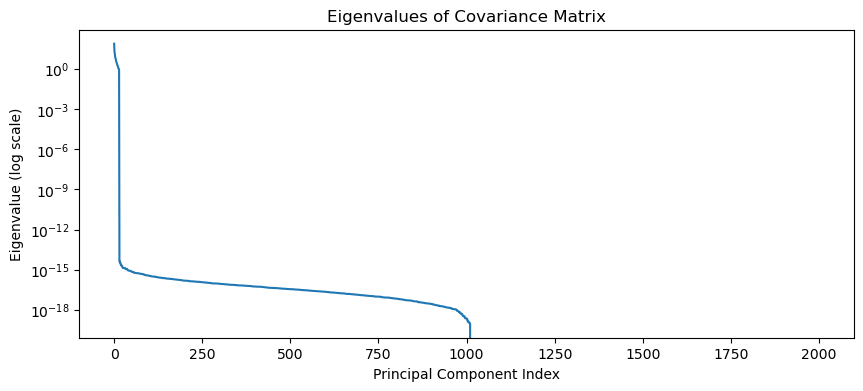

/Users/Anthony/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


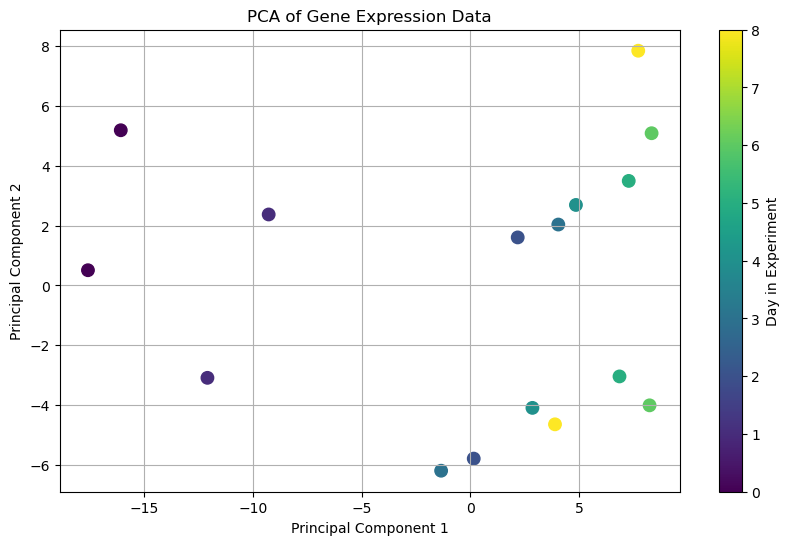

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Load the gene expression matrix
X = np.load('geneExpressionMat_X.npy')

# Mean center X by its genes (rows)
X_centered = X - X.mean(axis=1, keepdims=True)

# Find the covariance matrix of X
C = np.cov(X_centered, rowvar=True)

# Find and sort the eigenvalues and eigenvectors of the covariance matrix
evals, evecs = np.linalg.eig(C)
idx = np.argsort(evals)[::-1]
evals_sorted = evals[idx]
evecs_sorted = evecs[:, idx]

# Plot the real part of sorted eigenvalues (log scale)
plt.figure(figsize=(10, 4))
plt.semilogy(evals_sorted.real)
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue (log scale)')
plt.title('Eigenvalues of Covariance Matrix')
plt.show()

# Reproject the data onto the first two principal components
X_projected = np.dot(evecs_sorted[:, :2].T, X_centered)

# Group array for coloring points by day
group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]

# Plot the experiments (columns) on PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[0, :], X_projected[1, :], c=group, cmap='viridis', s=80)
plt.colorbar(label='Day in Experiment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.grid(True)
plt.show()

## What type of variance does PC1 capture about the experiment? what about PC2?
* PC1: Responsible for capturing the greatest amount of variance in the data. It is likely this corresponds to the most significant changes in gene expression in response to the Yamanaka Factors. This could be represented as the changes most cells are undergoing dedifferentiation.
* PC2: Responsible for capturing the second greatest amount of variance in the data. It is likely this corresponds to subtler shifts in gene expression that reflect different phases in response to the Yamanaka Factors.

#### Question 5: SVD on Images
Read in the following the `Leopard_Spots.png` image into your python enviornment using the code provided below.

* Perform a singular value decomposition on this image to get U, D, and V-transpose. 

* Make a semilogy plot of the ranked singular values

* Reconstruct an approximation of the image using 1, 2, 4, 8, 16, and 32 of the singular values.

* Dot-indexing a numpy array using the .nbytes call will return the number of bytes required to store a numpy array. Calculate the number of bytes to store the the full U, D, and V-transpose matrices. How much memory can you save by using the first 32 singular values?




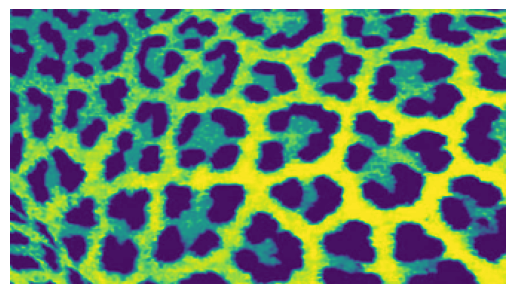

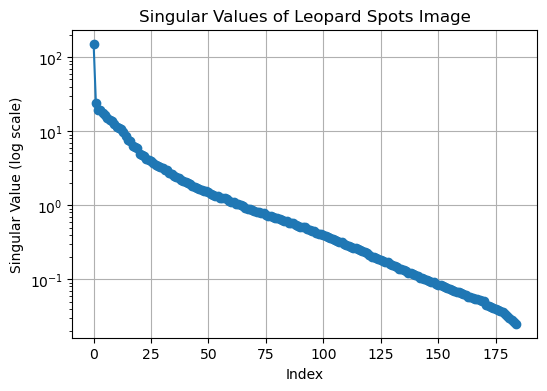

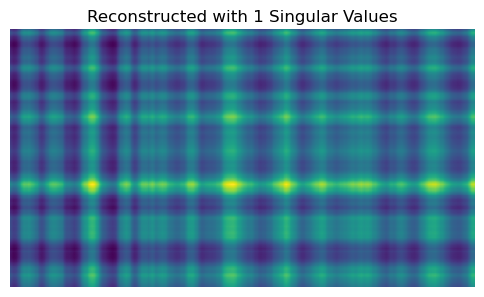

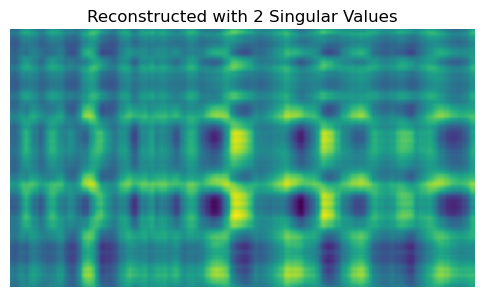

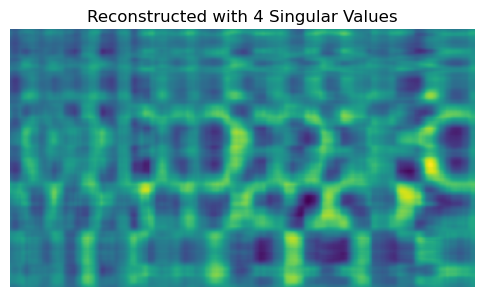

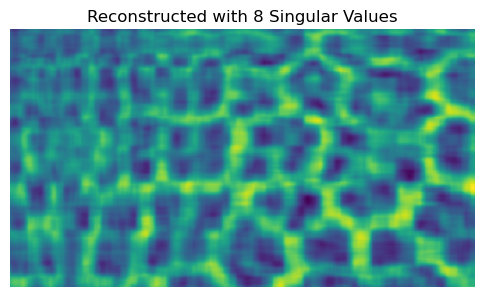

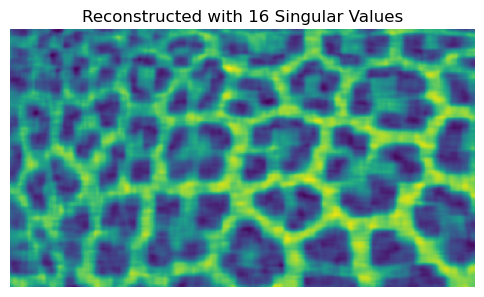

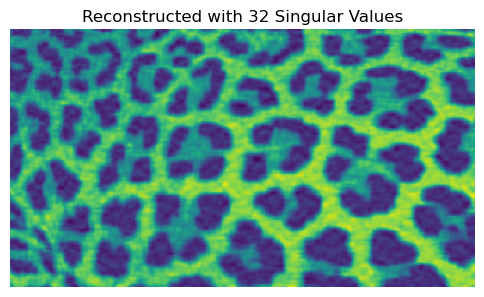

Full storage: 384800 bytes
Reduced storage with 32 singular values: 70528 bytes
Saved memory: 314272 bytes


In [73]:
im = plt.imread('Leopard_Spots.png') #read image
im = np.mean(im,-1)#converts RGB image to grayscale
plt.axis('off')
plt.imshow(im)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(im, full_matrices=False)

# Semilogy plot of ranked singular values
plt.figure(figsize=(6, 4))
plt.semilogy(S, marker='o')
plt.title('Singular Values of Leopard Spots Image')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')
plt.grid(True)
plt.show()

# Reconstruct the image with selected singular values
singular_values = [1, 2, 4, 8, 16, 32]
for r in singular_values:
    im_approx = np.dot(U[:, :r], np.dot(np.diag(S[:r]), Vt[:r, :]))
    plt.figure(figsize=(6, 6))
    plt.imshow(im_approx, cmap='viridis')
    plt.title(f'Reconstructed with {r} Singular Values')
    plt.axis('off')
    plt.show()

# Calculate storage requirements
full_bytes = U.nbytes + D.nbytes + Vt.nbytes
r = 32  # Using first 32 singular values
reduced_bytes = U[:, :r].nbytes + np.diag(S[:r]).nbytes + Vt[:r, :].nbytes
print(f'Full storage: {full_bytes} bytes')
print(f'Reduced storage with {r} singular values: {reduced_bytes} bytes')
print(f'Saved memory: {full_bytes - reduced_bytes} bytes')

#### Question 6: Differentiating between normal and cancerous cells (extra credit, not optional for grads)

PCA is a very important technique for finding fundamental differences between normal and cancerous cells. 
Download and import the `ovariancancer_obs.csv` dataset which contains gene data for 216 patients, 121 of whom have ovarian cancer and 95 of whom do not. For each patient there is a vector of data containing the expression of 4000 genes. The `ovariancancer_grp.csv` file contains the labels for the observations matrix. 

Perform a PCA on the observation. Reproject the data on the first 3 principal components and plot them while labeling the points as cancerous or normal. What principal component captures the variance that differentiates cancer from normal tissue?



#### Appendix
Methods for downloading and munging gene expression datasets from the Gene Expression Omnibus 

Open a terminal and type `pip install GEOparse` to install the package onto your computer

Go to the [GEO database website](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser) and browse through the datasets to find a unique ID.

In [ ]:
import GEOparse
import pandas as pd

# Downloading data set from the internet
gds = GEOparse.get_GEO(geo="GDS5316", destdir="./")
gds.metadata # see metadate

In [ ]:
#Explore the data
gds.columns #See columns of the experiment
gds.table #See datatable

In [ ]:
#Subset the data on the columns that you are interested in analyzing
cols = ['GSM943794','GSM943796','GSM943798','GSM943800','GSM943802','GSM943804','GSM943806','GSM943808',]
data = gds.table[cols]

#Remove rows with NaN - missing values
data = data.dropna()

#Convert to a numpy array for further analysis
X = data.to_numpy()